# Example Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


## Creating/Loading detector with misalignment

In [4]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("./save_file_3mio_iter2.taft")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [7]:
options={
    "ttree_loc": "alignment/mu3e",
}

hist, hist_2, hist_3 = melp.taft.find_cosmic_events("../../Downloads/mu3e_sorted_000002_cosmic.root",**options)

100 % | Total Frames:  4999840
Frames with hits:  3820323


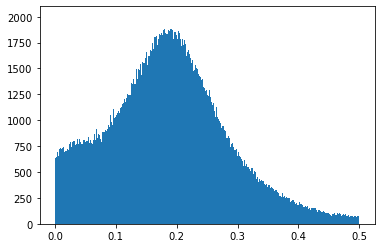

In [9]:
plt.hist(hist, bins=1000, range=(0,0.5))
plt.ylim(ymax = 2100, ymin = 0)
plt.show()

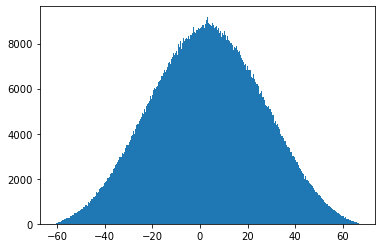

In [12]:
plt.hist(hist_2, bins=500)#, range=(-10,10))
#plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [13]:
print(np.median(hist_2))
print(1/np.sqrt(len(hist_2)))
print(len(hist_2))

3.0118623971939087
0.0006952642169473248
2068713


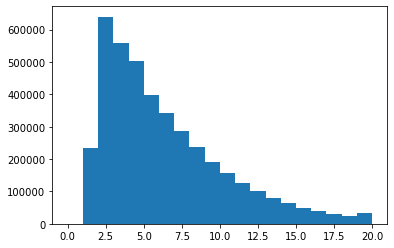

In [14]:
plt.hist(hist_3, bins=20, range=(0,20))
#plt.ylim(ymax = 2100, ymin = 0)
plt.show()

In [6]:
options={
    "ttree_loc": "alignment/mu3e",
    "mc_primary": True,
    "tof": False
}

hist = melp.taft.station_station_timing("../../Downloads/mu3e_sorted_000002_cosmic.root", mu3e_detector, **options)

KeyboardInterrupt: 

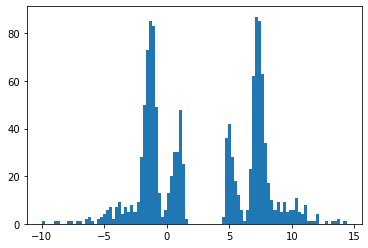

In [16]:
plt.hist(hist, bins=100)#, range=(-10,10))
#plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [6]:
options={
    "ttree_loc": "alignment/mu3e",
    "mc_primary": True,
    "tof": False,
    "station": 1
}


hist_z = melp.taft.cosmic_tof_correction("../../Downloads/mu3e_sorted_000002_cosmic.root", mu3e_detector, **options)

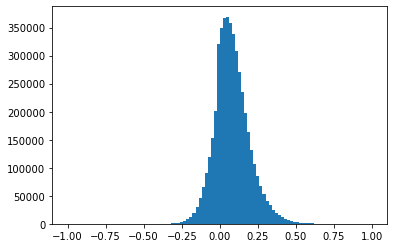

In [10]:
plt.hist(hist_z, bins=100, range=(-1,1))
plt.show()